# Your first Python pipeline

This tutorial will guide you to run your first pipeline with Ploomber. You can either use a terminal from your computer, deepnote (requires free account
but loads faster) or binder.

| [![deepnote-logo](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://deepnote.com/launch?template=deepnote&url=https://github.com/ploomber/projects/blob/master/spec-api-python/README.ipynb) | [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/projects/master?filepath=spec-api-python%2FREADME.ipynb) |
|---|---|

*Note:* you can follow this tutorial either from a terminal or an
IPython/Jupyter session. If using the terminal, just remove the `%%sh`, this is just a IPython/Jupyter feature to run shell commands, same as running the command from a terminal.

## Setup (if running locally, skip if using deepnote or binder)

Get code (run in a terminal):

~~~sh
git clone https://github.com/ploomber/projects
ce projects/spec-api-python
~~~

Install dependencies:

~~~sh
conda env create --file environment.yaml
conda activate spec-api-python
~~~

## Description

This pipeline contains 3 tasks. Let's visualize it:

*Note*: plotting is not supported in deepnote.

In [1]:
%%sh
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 3/3 [00:00<00:00, 5338.53it/s]


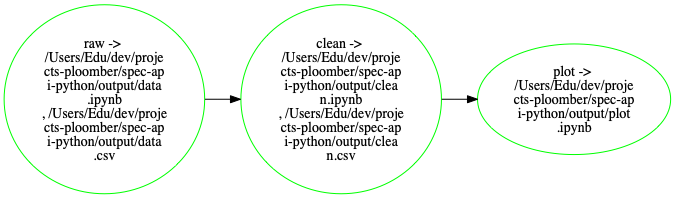

In [2]:

from IPython.display import Image
Image(filename='pipeline.png')

To get the pipeline description:

In [3]:
%%sh
ploomber status

name    Last run          Outdated?    Product             Doc (short)    Location
------  ----------------  -----------  ------------------  -------------  ----------
raw     4 hours ago (Nov  False        {'nb': File(/Users                 raw.py
        23, 20 at 14:32)               /Edu/dev/projects-
                                       ploomber/spec-api-
                                       python/output/data
                                       .ipynb), 'data': F
                                       ile(/Users/Edu/dev
                                       /projects-
                                       ploomber/spec-api-
                                       python/output/data
                                       .csv)}
clean   4 hours ago (Nov  False        {'nb': File(/Users                 clean.py
        23, 20 at 14:32)               /Edu/dev/projects-
                                       ploomber/spec-api-
                                       python/outp

100%|██████████| 3/3 [00:00<00:00, 4378.19it/s]


Dependencies are declared inside each script. Take a look a the three Python scripts to check out dependencies declared in in the ``upstream`` variable.
You should see that those dependencies match the diagram above.

*Note: *Each task in the pipeline is a Python script, but you can also use notebooks as tasks.

## Build the pipeline from the command line

In [4]:
%%sh
mkdir output
ploomber build

name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
raw     False               0             0
clean   False               0             0
plot    False               0             0


mkdir: output: File exists
100%|██████████| 3/3 [00:00<00:00, 2943.37it/s]
0it [00:00, ?it/s]


If you go back to the file list you'll see that `output/` is no longer
empty. Each script was converted to a notebook and executed, you'll also see a
few data files.


In [5]:
%%sh
ls output/

clean.csv
clean.csv.source
clean.ipynb
clean.ipynb.source
data.csv
data.csv.source
data.ipynb
data.ipynb.source
plot.ipynb
plot.ipynb.source


## Updating the pipeline

Quick experimentation is essential to develop data pipeline. Ploomber allows
you to quickly run new experiments without having to keep track of tasks
dependencies.

Let's say you found a problematic column in the data and want to add more
cleaning logic to your `clean.py` script. `raw.py` does not depend
on `clean.py` (it's actually the other way around), but `plot.py` does.

If you modify `clean.py`, you'd have to execute `clean.py` and
then `plot.py` to bring your pipeline up-to-date.

As your pipeline grows in number of tasks keeping track of task dependencies
isn't fun. Automatic dependency tracking guarantees that your tasks are using
the right inputs without having to re-compute the whole thing again.

Make some changes to the `clean.py` script, then build again:

In [6]:
%%sh
ploomber build

name    Ran?      Elapsed (s)    Percentage
------  ------  -------------  ------------
raw     False               0             0
clean   False               0             0
plot    False               0             0


100%|██████████| 3/3 [00:00<00:00, 2846.17it/s]
0it [00:00, ?it/s]


You'll see that `raw.py` didn't run because it was not affected by the change!

## Where to go from here

* The next tutorial explains Ploomber's (:doc:`../get-started/basic-concepts`)

The `pipeline.yaml` file is optional, for an example pipeline without it
[click here](../spec-api-directory/README.ipynb). However, it gives you more
flexibility, if you want to see a more complete example, take a look at
[`ml-basic/`](../ml-basic/README.ipynb), which builds a simple Machine
Learning pipeline where some of the tasks are Python functions (instead of scripts).

[`spec-api-sql/`](../spec-api-sql/README.ipynb) contains an example where data manipulation starts in a SQL
database, the data is downloaded and visualized using Python.

Using a `pipeline.yaml` file is a convenient way to write your workflows and is
often enough for a lot of projects. However, if you need more flexibility, you
can use the Python API directly, see the [`python-api/`](../python-api/README.ipynb) example.

If you use R, take a look a the [`spec-api-r/`](../spec-api-r/README.ipynb) example, which contains a similar
pipeline to this but using R.